In [ ]:
#Last update: 11 August 2025

dt = 250811
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
from collections import defaultdict
import time
from functools import lru_cache
import json
from itertools import product

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Define units
# ------------------------------------------------------------------------
# Basic Units
m = 1.0
N = 1.0
sec = 1.0

# Length
mm = m / 1000.0
cm = m / 100.0
inch = 25.4 * mm
ft = 12.0 * inch

# Force
kN=1000*N
kips = kN * 4.448221615
lb = kips / 1.0e3

# Stress (kN/m2 or kPa)
Pa = N / (m ** 2)
kPa = Pa * 1.0e3
MPa = Pa * 1.0e6
GPa = Pa * 1.0e9
ksi = 6.8947573 * MPa
psi = 1e-3 * ksi

# Mass - Weight
tonne = kN * sec ** 2 / m
kg = N * sec ** 2 / m
lb = psi*inch**2

# Gravitational acceleration
g = 9.81*m/sec**2

# Time
minute = 60*sec
hr = 60*minute

## Functions - Archetype Development

In [11]:
from ArchDev import Archetype_generator

In [12]:
combinations_Tier1 , combinations_Tier2 = Archetype_generator()

Total valid combinations: 12


## Functions - Lateral design

In [13]:
from LateralDesign import interpolate_mv_j,Force_Moment_distribution,Force_distribution, Interpolate_Sa,Seismic_design,Seismic_forces_NBCC

In [14]:
models = Seismic_design (file_path_arch = 'Archtypes_Tier2.xlsx', file_path_hazard = 'Hazard.xlsx') 

## Functions- Connection Design

In [15]:
from ConnectionDesign import CLT_resistance_calculator,Connection_design,Panel_capacity_check_I,Panel_capacity_check_II,WFS_check,WFT_check,rf_percentile,select_configs

In [ ]:
DesignModels = Connection_design(models, file_path='selected_Final.xlsx')

Model1 starts...
Model2 starts...
Model3 starts...
Model4 starts...
Model5 starts...
Model6 starts...
Model7 starts...
Model8 starts...
Model9 starts...
Model10 starts...
Model11 starts...
Model12 starts...
Model13 starts...
Model14 starts...
Model15 starts...
Model16 starts...
Model17 starts...
Model18 starts...
Model19 starts...
Model20 starts...
Model21 starts...
Model22 starts...
Model23 starts...
Model24 starts...
Model25 starts...
Model26 starts...
Model27 starts...
Model28 starts...
Model29 starts...
Model30 starts...
Model31 starts...
Model32 starts...
Model33 starts...
Model34 starts...
Model35 starts...
Model36 starts...
Model37 starts...
Model38 starts...
Model39 starts...
Model40 starts...
Model41 starts...
Model42 starts...
Model43 starts...
Model44 starts...
Model45 starts...
Model46 starts...
Model47 starts...
Model48 starts...
Model49 starts...
Model50 starts...
Model51 starts...
Model52 starts...
Model53 starts...
Model54 starts...
Model55 starts...
Model56 starts...
M

## Functions - Postprocessing

In [18]:
from Postprocessing import convert_for_json,my_converter,plot_model_distribution

In [ ]:

def convert_for_json(design_models):
    design_models_json = {}
    for model_id, model_data in design_models.items():
        new_model_data = model_data.copy()
        if "Config" in new_model_data:
            new_config = {}
            for storey, config in new_model_data["Config"].items():
                # If config is a pandas Series, convert it to a dictionary.
                if hasattr(config, "to_dict"):
                    new_config[storey] = config.to_dict()
                else:
                    new_config[storey] = config
            new_model_data["Config"] = new_config
        design_models_json[model_id] = new_model_data
    return design_models_json


def my_converter(o):
    if isinstance(o, np.integer):
        return int(o)
    elif isinstance(o, np.floating):
        return float(o)
    elif isinstance(o, np.ndarray):
        return o.tolist()

    else:
        return str(o)  

In [20]:
# Convert and save as JSON:
design_models_json = convert_for_json(DesignModels)
Json_file_name = str(dt)+"_"+"design_models.json"
with open(Json_file_name, "w") as f:
    json.dump(design_models_json, f, indent=4, default=my_converter)

In [ ]:
# To load it back:
with open(Json_file_name, "r") as f:
    design_models_loaded_json = json.load(f)

print(f'Number of Models: {len(design_models_loaded_json)}')

In [4]:
def plot_model_distribution(model_dict, categories):
    """
    Function to plot frequency distribution of model parameters using subplots.
    
    Parameters:
    model_dict (dict): Dictionary containing model properties.
    categories (list): List of categories to be assessed.
    """
    df = pd.DataFrame.from_dict(model_dict, orient='index')

    num_categories = len(categories)
    cols = 2  
    rows = (num_categories + 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))

    axes = axes.flatten()

    for i, category in enumerate(categories):
        sns.barplot(
            x=df[category].value_counts().index,
            y=df[category].value_counts().values,
            ax=axes[i],
            palette="crest"
        )
        axes[i].set_title(f'Distribution of {category}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(category, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

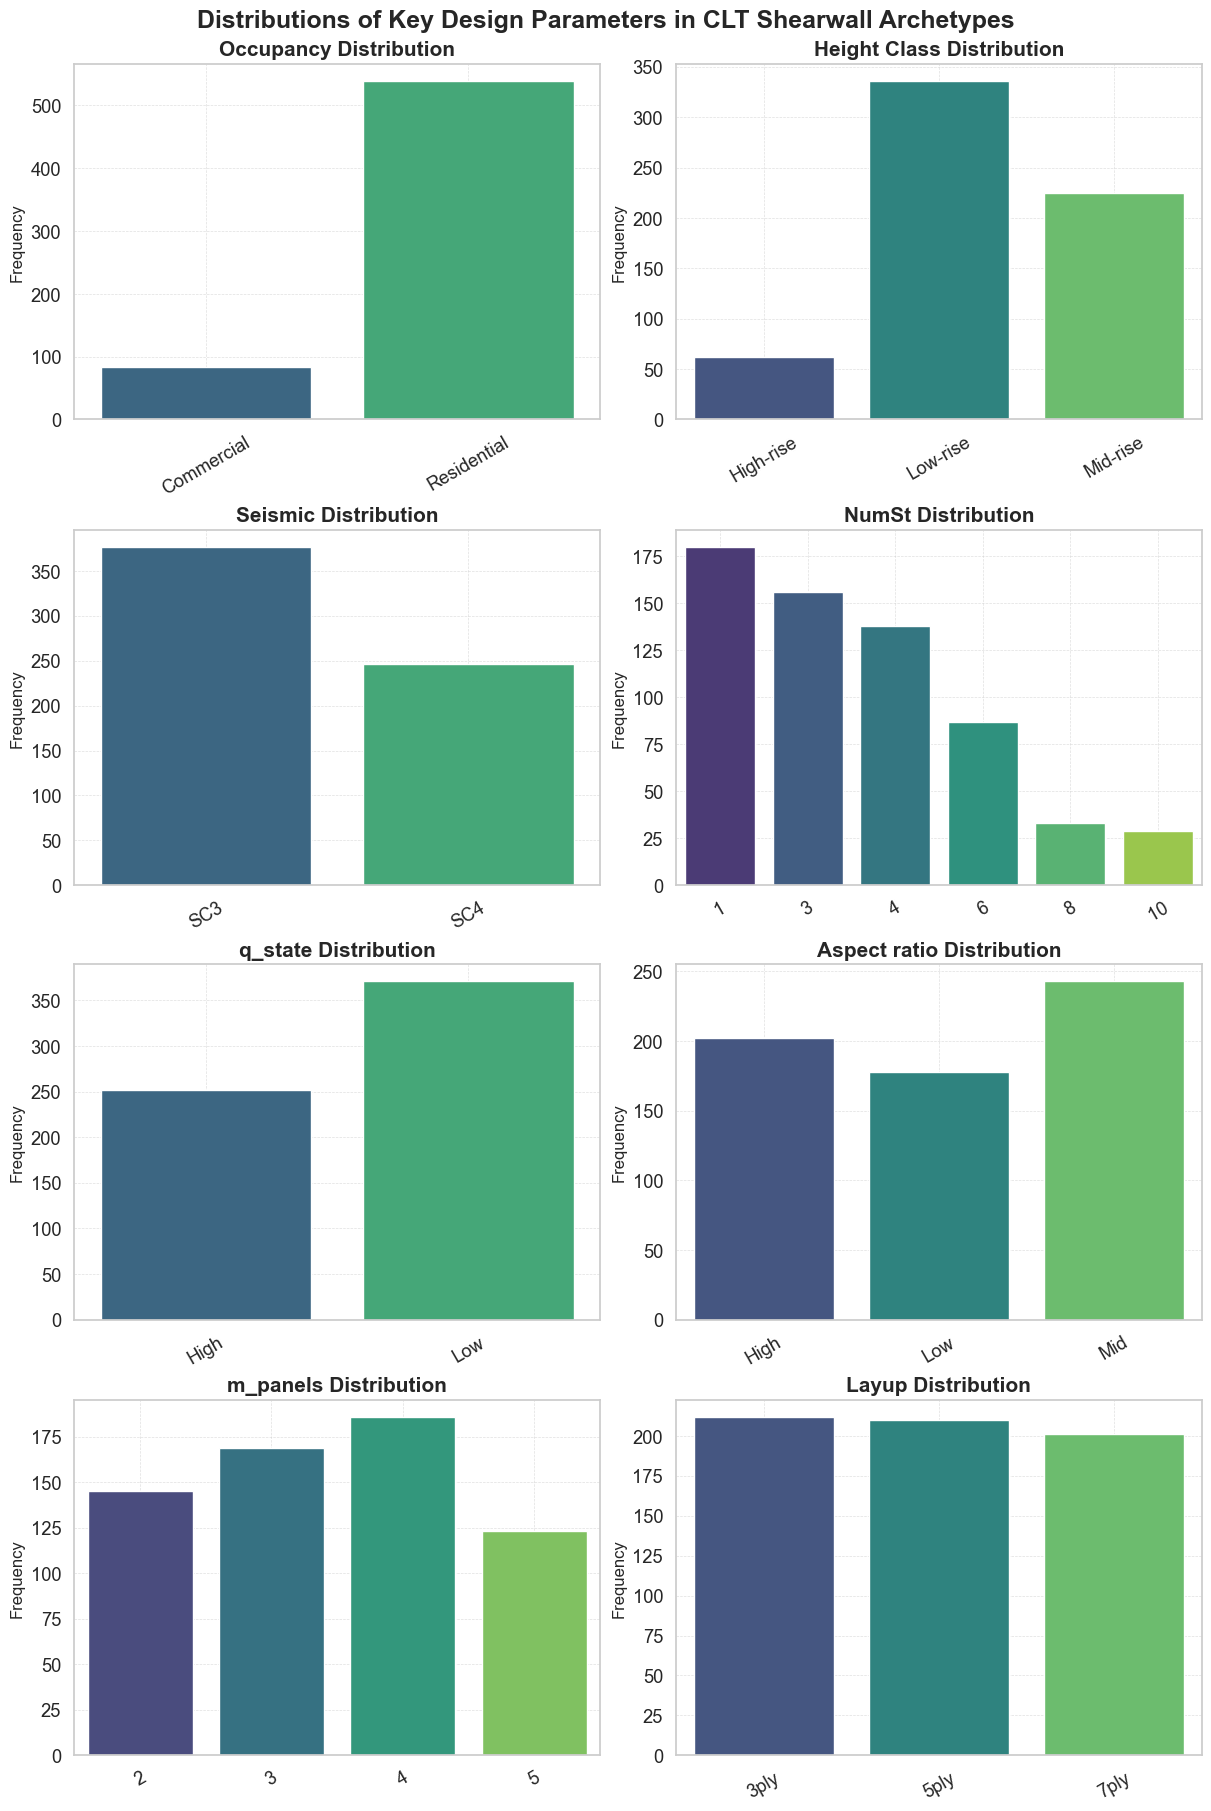

In [ ]:
def plot_model_distribution_enhanced(model_dict, categories):
    """
    Enhanced professional plotting for model parameter distributions.

    Parameters:
    model_dict (dict): Dictionary containing model properties.
    categories (list): List of categories to be assessed.
    """
    df = pd.DataFrame.from_dict(model_dict, orient='index')
    sns.set(style="whitegrid", context="notebook", font_scale=1.2)

    num_categories = len(categories)
    cols = 2
    rows = (num_categories + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4.5), constrained_layout=True)
    axes = axes.flatten()

    for i, category in enumerate(categories):
        sorted_counts = df[category].value_counts().sort_index()
        sns.barplot(
            x=sorted_counts.index,
            y=sorted_counts.values,
            ax=axes[i],
            palette="viridis"
        )
        axes[i].set_title(f'{category} Distribution', fontsize=15, weight='semibold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].tick_params(axis='x', rotation=30)
        axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  

    fig.suptitle('Distributions of Key Design Parameters in CLT Shearwall Archetypes', fontsize=18, weight='bold')
    plt.show()

# Run
categories = ['Occupancy', 'Height Class', 'Seismic', 'NumSt', 'q_state', 'Aspect ratio', 'm_panels', 'Layup']
plot_model_distribution_enhanced(design_models_loaded_json, categories)


In [ ]:
models = DesignModels.copy()

# Define the three feature sets
height_classes     = ['Low-rise', 'Mid-rise', 'High-rise']
occupancies        = ['Residential', 'Commercial']
seismic_categories = ['SC3', 'SC4']

# Prepare a dict to hold lists of model IDs for each combination
grouped_models = {
    (h, o, s): [] 
    for h, o, s in product(height_classes, occupancies, seismic_categories)
}

# Populate the groups
for model_id, attrs in models.items():
    h = attrs['Height Class']
    o = attrs['Occupancy']
    s = attrs['Seismic']
    key = (h, o, s)
    if key in grouped_models:
        grouped_models[key].append(model_id)
    else:
        # Optionally handle unexpected categories
        grouped_models.setdefault(key, []).append(model_id)

# Display counts for each of the 12 groups
for (h, o, s), model_ids in grouped_models.items():
    print(f"{h} / {o} / {s}: {len(model_ids)} models")

In [ ]:
file_name_flatten = str(dt)+"_"+"flatten_design_models.json"
rows = []
for model_id, model in models.items():
    meta = {
        'model_id': int(model_id),
        'Height_Class': model.get('Height Class'),
        'Occupancy': model.get('Occupancy'),
        'Seismic': model.get('Seismic'),
        'Aspect_Ratio': model.get('Aspect ratio'),
        'NumSt': model.get('NumSt'),
        'q_value': model.get('q_value')
    }
    # per-storey demand arrays
    shears = model.get('Shears', {})
    moments = model.get('Moments', {})
    
    # Selected config per storey
    sel_cfgs = model.get('Config', {})
    
    # All available configs to count per storey
    all_cfgs = model.get('Allconfigs', {})
    
    # iterate through storeys present in selected config
    for storey_str, cfg in sel_cfgs.items():
        if storey_str == '0':
            continue  # skip possible base
        row = meta.copy()
        row['storey_index'] = int(storey_str)
        row['V_demand'] = shears.get(storey_str, np.nan)
        row['M_demand'] = moments.get(storey_str, np.nan)
        
        # selected zone labels
        zones = cfg.get('Zone_labels', {})
        row['WWS_zone'] = zones.get('WWS')
        row['WFS_zone'] = zones.get('WFS')
        row['WFT_zone'] = zones.get('WFT')
        
        # mechanical targets
        mech = cfg.get('Wall_mech', {})
        row['Kw'] = mech.get('Kw')
        row['Omega'] = mech.get('Omega')
        row['Rwr'] = mech.get('Rwr')
        
        # count all configurations
        cfg_list = all_cfgs.get(storey_str, [])
        row['config_count'] = len(cfg_list) if isinstance(cfg_list, (list, dict)) else np.nan
        
        rows.append(row)

df_flat = pd.DataFrame(rows)

# Save to CSV
df_flat.to_csv(file_name_flatten, index=False)